In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import src.network as network
import src.network_utils as net_utils

# Binary Classification

One of the main categories of problems that can be solved using neural networks are classification problems in which a set of input data must be classified into a finite set of possible classes. The most basic kind of classification problem is binary classification, where only two possible classes exist.  

To demonstrate the solvability of binary classification problems, a set of tests were conducted using hand drawn black and white images, where the white pixels are classified as 1 and the black pixels as 0. Thus, the network can be viewed as constructing a function $ f: [0,1]\times[0,1] \rightarrow \{0,1\} $ which best approximates the image. For each image, a random sample of pixel coordinates, normalized to values between 0 and 1, were generated along with a label of either 0 or 1. A neural network model was then trained on this set of input data.  

Since each neuron in a single layer network acts as a hyperplane in n-dimensional space, each neuron splits the input region into two seperate regions, with one positive and one negative region. By connecting several hyperplanes, a classification region can be formed. Therefore, depending on the complexity of the region, we can estimate the number of neurons required to properly converge to the appropriate function. For example, a triangular region with 3 sides can't be completely classified using only 2 hyperplanes. However, with 3 hyperplanes, the region can be classified. This begins to demonstrate a notion a of network's capacity to classify a given region based on its complexity.  

The following examples utilize some basic cases to verify this concept.

## Helper Functions for Experimentation

In [2]:
def display_original_image(src):
    im = PIL.Image.open(src).convert('L').resize((1000, 1000))
    im = np.array(im)

    print("Displaying original Image:")
    plt.figure(figsize=(6,6))
    plt.imshow(im, cmap='gray')
    plt.show()
    

def display_neurons(net):
    nets = net_utils.generate_hyperplanes(net)
    print("Displaying Neurons")
    for net in nets:
        out_arr = net_utils.visualize_2d_function(net.forward_prop, [250, 250], convert=False)
        plt.figure(figsize=(6,6))
        plt.imshow(out_arr, cmap='gray')
        plt.show()
        
        
def analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=True):
    if display_hyperplanes:
        display_neurons(net)
    display_original_image(src)
    print(f'{shape} Classification Test ({num_neurons} neurons)')
    print(f'Accuracy: {round(acc,2)}%')
    out_arr = net_utils.visualize_2d_function(net.forward_prop, [250, 250], convert=False)
    plt.figure(figsize=(6,6))
    plt.imshow(out_arr, cmap='gray')
    plt.show()
    
    
def train_net(image, num_neurons, mini_batch_size, eta, epochs):
    if isinstance(num_neurons, list):
        net = network.Network([network.Linear(2, num_neurons[0]),
                               network.Sigmoid(),
                               network.Linear(num_neurons[0], num_neurons[1]),
                               network.Sigmoid(),
                               network.Linear(num_neurons[1], 1),
                               network.Sigmoid()])
    else:
        net = network.Network([network.Linear(2,num_neurons),
                               network.Sigmoid(),
                               network.Linear(num_neurons,1),
                               network.Sigmoid()])
        
    data, labels = net_utils.generate_image_data(image, 15000, (1000, 1000))
    print("Training network:")
    net.train(data[0:10000], labels[0:10000], mini_batch_size, eta, epochs, 0)
    print("Done.")
    return net, net.evaluate_percentage(data[10000:15000], labels[10000:15000])

### Triangular Region with 2 Neurons

Training network:
Done.
Displaying original Image:


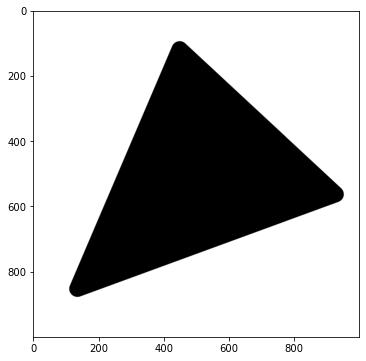

Triangle Classification Test (2 neurons)
Accuracy: 68.46%


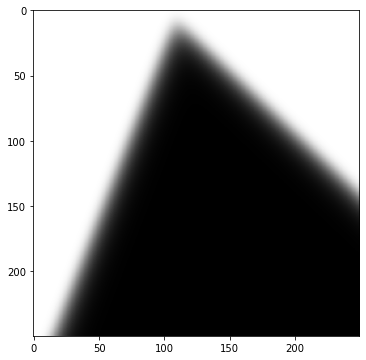

In [3]:
src = 'data/triangle.png'
shape = 'Triangle'
num_neurons = 2
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Triangular Region with 3 Neurons

Training network:
Done.
Displaying original Image:


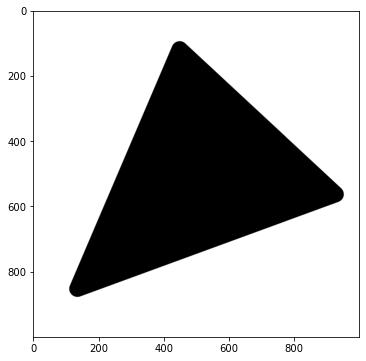

Triangle Classification Test (3 neurons)
Accuracy: 97.36%


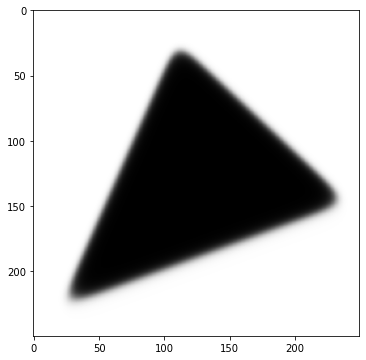

In [4]:
src = 'data/triangle.png'
shape = 'Triangle'
num_neurons = 3
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Square Region with 3 Neurons

Training network:
Done.
Displaying original Image:


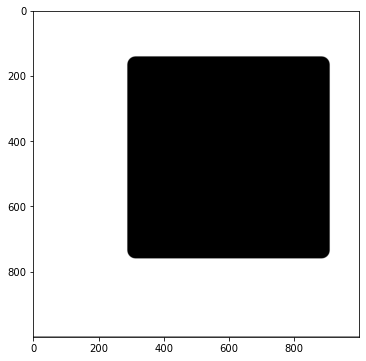

Square Classification Test (3 neurons)
Accuracy: 92.32%


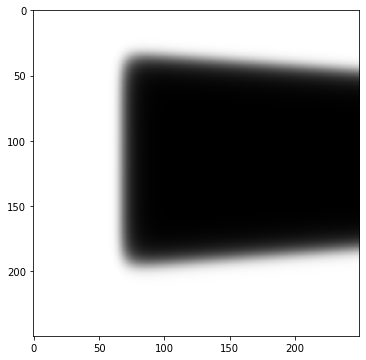

In [5]:
src = 'data/square.png'
shape = 'Square'
num_neurons = 3
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Square Region with 4 Neurons

Training network:
Done.
Displaying original Image:


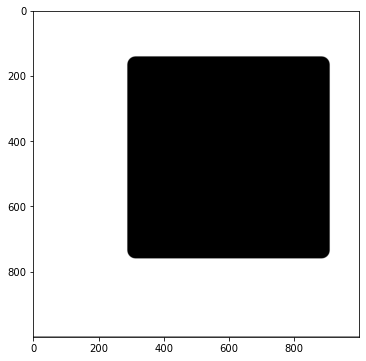

Square Classification Test (4 neurons)
Accuracy: 96.42%


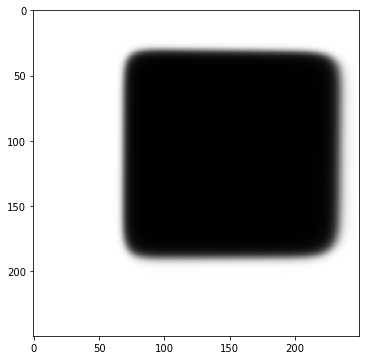

In [6]:
src = 'data/square.png'
shape = 'Square'
num_neurons = 4
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Circular Region with 5 Neurons

Training network:
Done.
Displaying original Image:


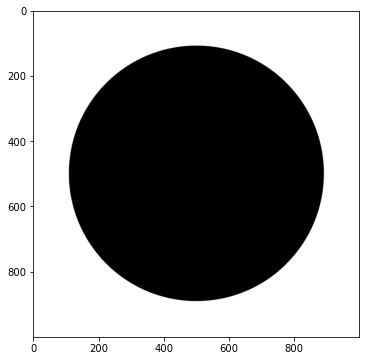

Circle Classification Test (5 neurons)
Accuracy: 94.84%


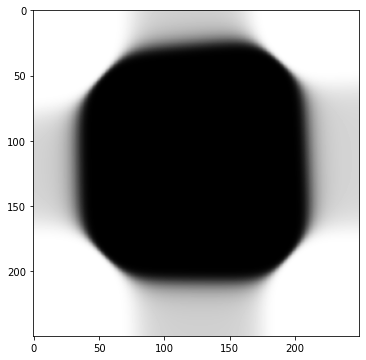

In [7]:
src = 'data/circle.png'
shape = 'Circle'
num_neurons = 5
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Circular Region with 10 Neurons

Training network:
Done.
Displaying original Image:


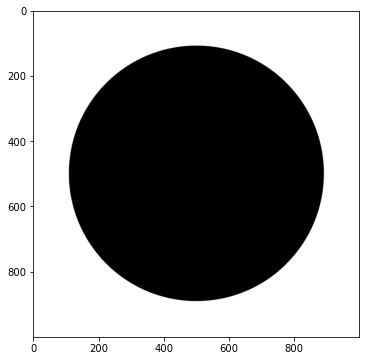

Circle Classification Test (10 neurons)
Accuracy: 96.34%


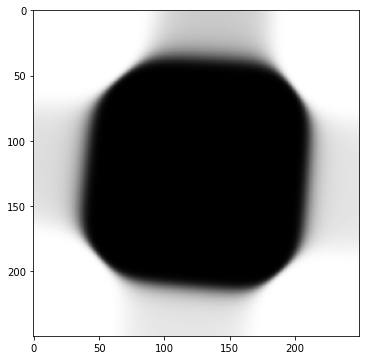

In [8]:
src = 'data/circle.png'
shape = 'Circle'
num_neurons = 10
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Circular Region with 30 Neurons

Training network:
Done.
Displaying original Image:


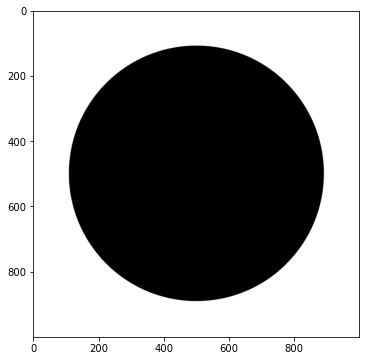

Circle Classification Test (30 neurons)
Accuracy: 96.08%


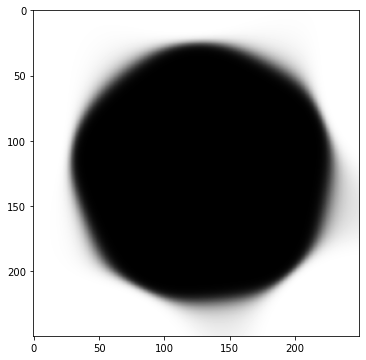

In [9]:
src = 'data/circle.png'
shape = 'Circle'
num_neurons = 30
mini_batch_size = 16
eta = 8
epochs = 20

net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Arbitrary Region with 6 Neurons

Training network:
Done.
Displaying original Image:


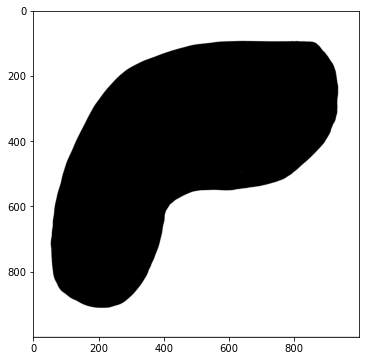

Arbitrary Classification Test (6 neurons)
Accuracy: 58.44%


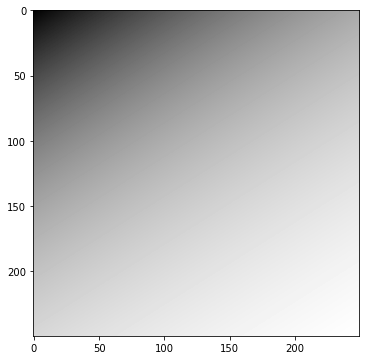

In [10]:
src = 'data/blob.png'
shape = 'Arbitrary'
num_neurons = 6
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Arbitrary Region with 12 Neurons

Training network:
Done.
Displaying original Image:


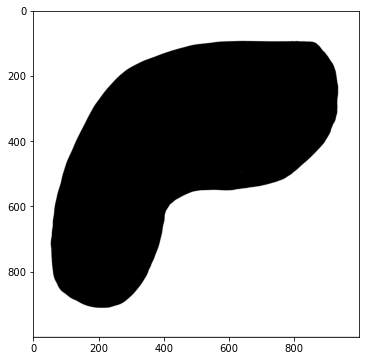

Arbitrary Classification Test (12 neurons)
Accuracy: 92.32%


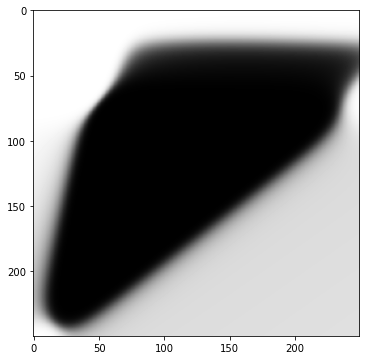

In [11]:
src = 'data/blob.png'
shape = 'Arbitrary'
num_neurons = 12
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Arbitrary Region with 18 Neurons

Training network:
Done.
Displaying original Image:


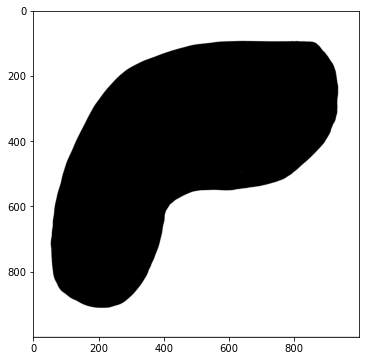

Arbitrary Classification Test (18 neurons)
Accuracy: 93.5%


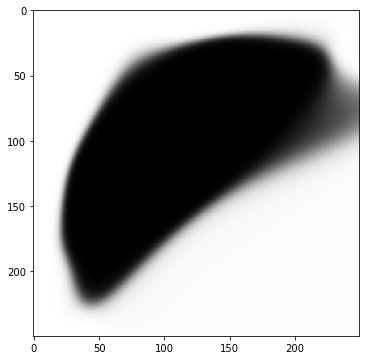

In [12]:
src = 'data/blob.png'
shape = 'Arbitrary'
num_neurons = 18
mini_batch_size = 16
eta = 12
epochs = 20
net, acc = train_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

## Additional Testing with ReLU Activation Function

In [13]:
def train_relu_net(image, num_neurons, mini_batch_size, eta, epochs):
    if isinstance(num_neurons, list):
        net = network.Network([network.Linear(2, num_neurons[0]),
                               network.ReLU(),
                               network.Linear(num_neurons[0], num_neurons[1]),
                               network.ReLU(),
                               network.Linear(num_neurons[1], 1),
                               network.Sigmoid()])
    else:
        net = network.Network([network.Linear(2,num_neurons),
                               network.ReLU(),
                               network.Linear(num_neurons,1),
                               network.Sigmoid()])
        
    data, labels = net_utils.generate_image_data(image, 15000, (1500, 1000))
    print("Training network:")
    net.train(data[0:10000], labels[0:10000], mini_batch_size, eta, epochs, 0)
    print("Done.")
    return net, net.evaluate_percentage(data[10000:15000], labels[10000:15000])

### Triangular Region with 3 Neurons

Training network:
Done.
Displaying original Image:


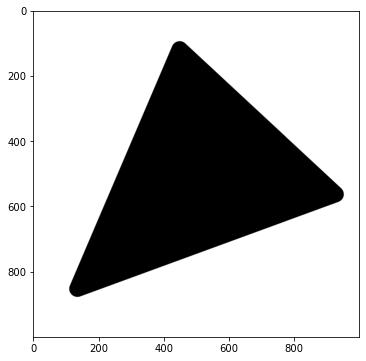

Triangle Classification Test (3 neurons)
Accuracy: 98.86%


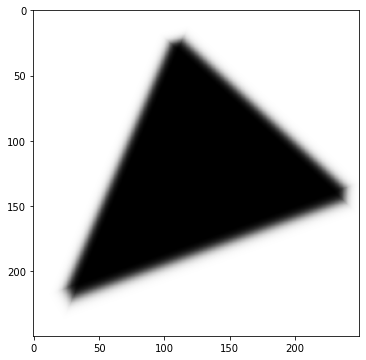

In [14]:
src = 'data/triangle.png'
shape = 'Triangle'
num_neurons = 3
mini_batch_size = 16
eta = 1.2
epochs = 20
net, acc = train_relu_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

### Triangular Region with 6 Neurons

Training network:
Done.
Displaying original Image:


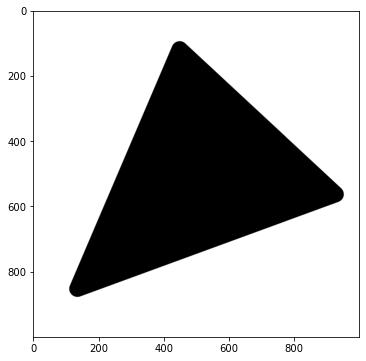

Triangle Classification Test (6 neurons)
Accuracy: 98.42%


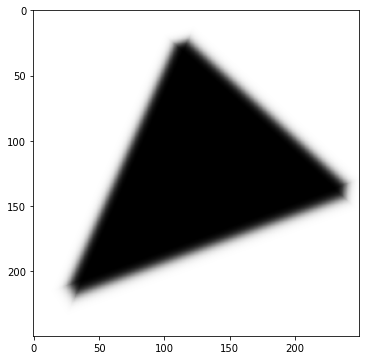

In [16]:
src = 'data/triangle.png'
shape = 'Triangle'
num_neurons = 6
mini_batch_size = 16
eta = 1.2
epochs = 20
net, acc = train_relu_net(src, num_neurons, mini_batch_size, eta, epochs)
analyze_net(net, acc, src, shape, num_neurons, display_hyperplanes=False)

## Results

The examples above demonstrate the capacity of a network for the most basic examples. Since a single layer nework can be thought of as a linear combination of ideal hyperplanes, it is clear that an n-sided convex shape cannot be accurately approximated with a network with less than n hyperplanes. However, when the number of hyperplanes equals the number of sides, the region can be accurately classified.  

The ReLU activation function was also tested for the triangular region with equivalent success.  

The networks begin to have more difficulty converging to more arbitrary and complex regions, particularly when concavity is introduced. Other concave classification problems are discussed in the `concave_classification.ipynb` notebook. 